In [14]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn import preprocessing

In [4]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

In [5]:
ds = pd.read_csv("input/dataset_clean.csv",  index_col = 0)
ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,cielorazo,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,age,Target,MaterialPared,MaterialPiso,MaterialTecho,AbastecimientoAgua,AbastecimientoElectricidad,TipoSanitario,EnergiaCocina,EliminacionBasura,EstadoPared,EstadoTecho,EstadoPiso,Genero,TipoVivienda,Region,Zona
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,1,43,4,paredblolad,pisomoscer,techoentrepiso,abastaguadentro,public,sanitario2,energcocinar3,elimbasu1,epared2,etecho1,eviv1,male,tipovivi3,Central,Urbana
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,1,67,4,paredmad,pisomadera,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho2,eviv2,male,tipovivi3,Central,Urbana
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,0,0,92,4,paredmad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared2,etecho3,eviv3,female,tipovivi1,Central,Urbana
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,3,17,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,male,tipovivi3,Central,Urbana
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,3,37,4,paredblolad,pisomoscer,techozinc,abastaguadentro,public,sanitario2,energcocinar2,elimbasu1,epared3,etecho3,eviv3,female,tipovivi3,Central,Urbana


In [33]:
df = ds[['v2a1', "age", "escolari","instlevel1", "instlevel2", "instlevel3", "instlevel4", "instlevel5", "instlevel6", "instlevel7", "instlevel8", "instlevel9", "Region", "Zona", "Target"]]
df.describe()

,v2a1,age,escolari,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.652316e+05,34.303547,7.200272,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,3.302292
std,1.504571e+05,21.612261,4.730877,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,1.009565
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.300000e+05,31.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,2.000000e+05,51.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,2.353477e+06,97.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [48]:
print(df[df.age.isnull()].shape)
print(df[df.escolari.isnull()].shape)
print(df[df.v2a1.isnull()].shape)

(0, 15)
(0, 15)
(6860, 15)


In [12]:
df[["age", "escolari", "v2a1"]].iplot(kind='box')

In [11]:
df['age'].value_counts().sort_index().iplot()

In [9]:
data = [go.Scatter(x=df.age, y=df.escolari,  mode = 'markers')]

iplot(data)

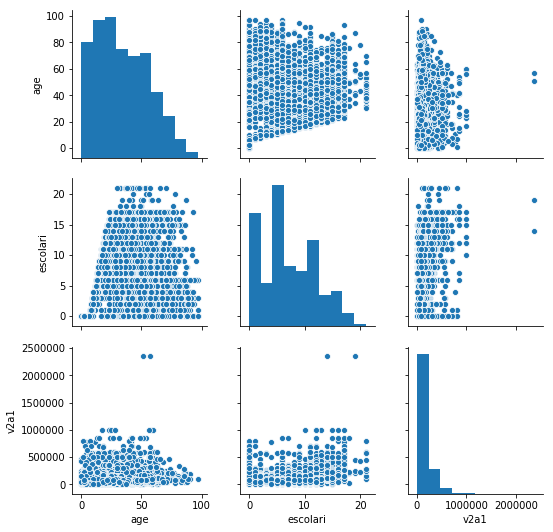

In [17]:
seaborn.pairplot(df[["age", "escolari", "v2a1"]])
#df[["age", "escolari", "v2a1"]].scatter_matrix()

In [20]:
data = []

for d in df.groupby("Region"):
    data.append(go.Box(x=d[1].v2a1, name=d[0], boxmean=True))
iplot(data)

In [29]:
data = []

for d in df.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].v2a1, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot(data)

In [30]:
data = []

for d in df.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].age, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot(data)

In [31]:
data = []

for d in df.groupby(["Region", "Zona"]):
    data.append(go.Box(y=d[1].escolari, name=d[0][0]+"-"+d[0][1], boxmean=True))
iplot(data)

In [39]:
data = []
dfPaga = df[df["v2a1"] > 0]
for d in dfPaga.groupby(["Target"]):
    data.append(go.Box(y=d[1].v2a1, name=d[0], boxmean=True))
iplot(data)


In [40]:
data = []
dfPaga = df[df["v2a1"] > 0]
for d in dfPaga.groupby(["Target"]):
    data.append(go.Box(y=d[1].escolari, name=d[0], boxmean=True))
iplot(data)

In [56]:

data = [
     go.Histogram(x=df["age"],opacity=0.75,name="global", nbinsx = 20),
]

iplot(go.Figure(data=data, layout=go.Layout(barmode='overlay')))


In [59]:
df.pivot_table(index="age", columns=["age", "escolari"])

        age  escolari
v2a1    0    0           127552.485714
        1    0           143874.444444
        2    0           138681.580000
        3    0           150706.754386
        4    0           167934.666667
        5    0           150624.916667
        6    0           157115.466667
        7    0           178482.971429
             1           152400.000000
        8    0            57500.000000
             1           160115.384615
             2           174487.428571
        9    1           160000.000000
             2           135509.033333
             3           117500.000000
        10   0           160000.000000
             2           145300.000000
             3           159858.636364
             4           134631.000000
        11   1                     NaN
             2            80000.000000
             3           128333.333333
             4           181821.176471
             5           129285.714286
        12   2            50000.000000
   

- Qué tipo de variable es cada una?

edad, escolari y v2a1 son variables continuas

- Existen outliers en las variables seleccionadas?

General no

- Hay valores faltantes? Qué decisión tomarán al respecto en esta instancia de análisis? Es mejor descartarlos o completarlos con un valor particular?

v2a1 es el unico que tiene valores en NAN, y prefiero dejarlos asi porque probablemente propietarios de su casa

- Cómo es la distribución de las variables en el dataset? Se distribuyen de manera normal? Qué implicancias tiene esto?


- Cómo es la distribución condicionada a otra variable?